In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


df = pd.read_csv("./logs/speriodic_benchmark_throughput.log", sep=";").sort_values(by="Filename")
df = df.fillna(-1)
df[ ["sumki", "SPeriodic" , "1Periodic" , "KPeriodic"]] = df[ ["sumki", "SPeriodic" , "1Periodic" , "KPeriodic"]].where(df[ ["sumki", "SPeriodic" , "1Periodic" , "KPeriodic"]] >= 0, np.nan)


df["Filename"] = df["Filename"].replace(".+//(.*).xml","\\1", regex=True)
df

,Filename,tasks,buffers,sumqt,sumphit,sumnt,sumki,SPeriodic,1Periodic,KPeriodic
11,AGB5CSDF/autogen1,90,617,183420,126,250992,NaN,NaN,4.845521e-08,NaN
10,AGB5CSDF/autogen2,70,473,15081497,196,41331062,NaN,NaN,1.555722e-11,NaN
13,AGB5CSDF/autogen3,154,671,127913273,368,308818852,NaN,NaN,4.759341e-13,NaN
14,AGB5CSDF/autogen4,2426,2900,23330,5422,51301,2437.0,2.083333e-02,2.678571e-02,2.777778e-02
12,AGB5CSDF/autogen5,2767,4894,208907,4167,312485,32163.0,5.254309e-05,5.254309e-05,2.439024e-03
2,IB5CSDF/BlackScholes,41,40,923,261,2379,41.0,1.790770e-08,2.377932e-08,2.377932e-08
1,IB5CSDF/BlackScholes_sized,41,80,923,261,2379,44.0,6.216107e-09,1.532239e-08,1.551065e-08
4,IB5CSDF/Echo,38,82,35003,45,42003,38.0,4.055366e-11,1.963012e-10,1.963012e-10
8,IB5CSDF/Echo_sized,38,164,35003,45,42003,35003.0,4.055366e-11,5.473867e-11,1.666062e-10
5,IB5CSDF/H264,666,3128,762,1375,1471,666.0,NaN,4.200216e-06,4.200216e-06


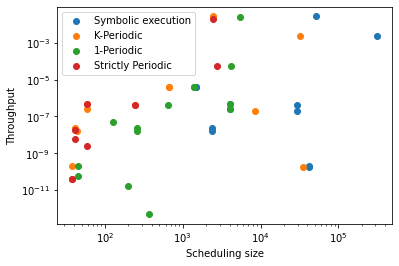

In [2]:
plt.scatter (df["sumnt"], df["KPeriodic"], label="Symbolic execution")
plt.scatter (df["sumki"], df["KPeriodic"], label="K-Periodic")
plt.scatter (df["sumphit"], df["1Periodic"], label="1-Periodic")
plt.scatter (df["tasks"], df["SPeriodic"], label="Strictly Periodic")
plt.yscale("log")
plt.xscale("log")

plt.xlabel("Scheduling size")
plt.ylabel("Throughput")

_=plt.legend()

,Filename,tasks,buffers,sumqt,sumphit,sumnt,sumki,SPeriodic,1Periodic,KPeriodic
11,AGB5CSDF/autogen1,90,617,183420,126,250992,NaN,NaN,NaN,NaN
10,AGB5CSDF/autogen2,70,473,15081497,196,41331062,NaN,NaN,NaN,NaN
13,AGB5CSDF/autogen3,154,671,127913273,368,308818852,NaN,NaN,NaN,NaN
14,AGB5CSDF/autogen4,2426,2900,23330,5422,51301,2437.0,0.750000,0.964286,1.0
12,AGB5CSDF/autogen5,2767,4894,208907,4167,312485,32163.0,0.021543,0.021543,1.0
2,IB5CSDF/BlackScholes,41,40,923,261,2379,41.0,0.753079,1.000000,1.0
1,IB5CSDF/BlackScholes_sized,41,80,923,261,2379,44.0,0.400764,0.987863,1.0
4,IB5CSDF/Echo,38,82,35003,45,42003,38.0,0.206589,1.000000,1.0
8,IB5CSDF/Echo_sized,38,164,35003,45,42003,35003.0,0.243410,0.328551,1.0
5,IB5CSDF/H264,666,3128,762,1375,1471,666.0,NaN,1.000000,1.0


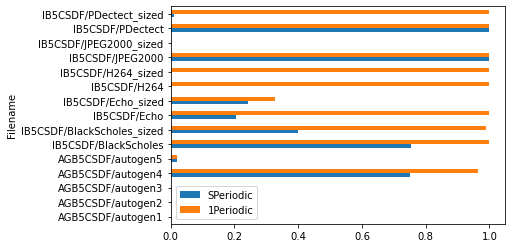

In [3]:
opti_df = df.copy()
opti_df["SPeriodic"] = opti_df["SPeriodic"] / opti_df["KPeriodic"]
opti_df["1Periodic"] = opti_df["1Periodic"] / opti_df["KPeriodic"]
opti_df["KPeriodic"] = opti_df["KPeriodic"] / opti_df["KPeriodic"]

opti_df.plot(x="Filename", y=["SPeriodic", "1Periodic"], kind="barh")
opti_df

In [73]:
newnames = {"Filename": "Graph", 
             "tasks": "#tasks", 
             "buffers": "#buffers", 
             "SPeriodic": "Strictly Periodic", 
             "1Periodic": "1-Periodic", 
             "KPeriodic": "K-Periodic",
           "sumnt" : 'Complexity'}


rdf = df.rename(columns=newnames)
rdf = rdf.drop(columns=["sumqt", "sumphit", "sumki"])
colformat = '|'.join([''] + ['l'] * rdf.index.nlevels + ['r'] * rdf.shape[1] + [''])
latex = rdf.to_latex(float_format="{:0.2E}".format, column_format=colformat, index=False)
#.replace('\\\\\n', '\\\\ \\midrule\n').replace("  ", " ").replace("  ", " ").replace("  ", " ")
print(latex)

\begin{tabular}{|l|r|r|r|r|r|r|r|}
\toprule
                      Graph &  \#tasks &  \#buffers &  Complexity &  Strictly Periodic &  1-Periodic &  K-Periodic \\
\midrule
          AGB5CSDF/autogen1 &      90 &       617 &      250992 &          -1.38E-06 &    4.85E-08 &         NAN \\
          AGB5CSDF/autogen2 &      70 &       473 &    41331062 &          -1.64E-09 &    1.56E-11 &         NAN \\
          AGB5CSDF/autogen3 &     154 &       671 &   308818852 &          -3.02E-10 &    4.76E-13 &         NAN \\
          AGB5CSDF/autogen4 &    2426 &      2900 &       51301 &           2.08E-02 &    2.68E-02 &    2.78E-02 \\
          AGB5CSDF/autogen5 &    2767 &      4894 &      312485 &           5.25E-05 &    5.25E-05 &    2.44E-03 \\
       IB5CSDF/BlackScholes &      41 &        40 &        2379 &           1.79E-08 &    2.38E-08 &    2.38E-08 \\
 IB5CSDF/BlackScholes\_sized &      41 &        80 &        2379 &           6.22E-09 &    1.53E-08 &    1.55E-08 \\
               I

In [53]:
def print_schedule_size_table(df):

    newnames = {
        "Filename": "Graph",
        "tasks": "Strictly Periodic",
        "sumphit": "1-Periodic",
        "sumki": "K-Periodic",
        "sumnt": "MCM",
    }

    # rdf = df.drop(columns=["buffers","sumqt","1Periodic", "KPeriodic", "SPeriodic"])
    # rdf = df.rename(columns=newnames)
    rdf = df[["Graph", "Strictly Periodic", "1-Periodic", "K-Periodic", "MCM"]]

    
    
    colformat = "|".join([""] + ["l"] * rdf.index.nlevels + ["r"] * rdf.shape[1] + [""])
    latex = rdf.to_latex(
        float_format="{:0.0f}".format, column_format=colformat, index=False
    )
    # .replace('\\\\\n', '\\\\ \\midrule\n').replace("  ", " ").replace("  ", " ").replace("  ", " ")
    print(latex)

def open_csv(filename):

    df = pd.read_csv(filename, sep=";").sort_values(by="Filename")
    df = df.fillna(-1)
    df[["sumki", "SPeriodic", "1Periodic", "KPeriodic"]] = df[
        ["sumki", "SPeriodic", "1Periodic", "KPeriodic"]
    ].where(df[["sumki", "SPeriodic", "1Periodic", "KPeriodic"]] >= 0, np.nan)
    df["Filename"] = df["Filename"].replace(".+//(.*).xml", "\\1", regex=True)
    return df


In [54]:
df = open_csv("/home/toky/yalenus/research/papers/StrictlyPeriodic/speriodic_log/speriodic_benchmark_throughput.log")
df

,Filename,tasks,buffers,sumqt,sumphit,sumnt,sumki,SPeriodic,1Periodic,KPeriodic
10,AGB5CSDF/autogen1,90,617,183420,126,250992,250992.0,NaN,4.845521e-08,3.840246e-05
11,AGB5CSDF/autogen2,70,473,15081497,196,41331062,NaN,NaN,1.555722e-11,NaN
12,AGB5CSDF/autogen3,154,671,127913273,368,308818852,NaN,NaN,4.759341e-13,NaN
13,AGB5CSDF/autogen4,2426,2900,23330,5422,51301,5449.0,2.083333e-02,2.678571e-02,2.777778e-02
14,AGB5CSDF/autogen5,2767,4894,208907,4167,312485,60009.0,5.254309e-05,5.254309e-05,2.439024e-03
0,IB5CSDF/BlackScholes,41,40,923,261,2379,261.0,1.790770e-08,2.377932e-08,2.377932e-08
1,IB5CSDF/BlackScholes_sized,41,80,923,261,2379,264.0,6.216107e-09,1.532239e-08,1.551065e-08
2,IB5CSDF/Echo,38,82,35003,45,42003,45.0,4.055366e-11,1.963012e-10,1.963012e-10
3,IB5CSDF/Echo_sized,38,164,35003,45,42003,42003.0,4.055366e-11,5.473867e-11,1.666062e-10
4,IB5CSDF/H264,666,3128,762,1375,1471,1375.0,NaN,4.200216e-06,4.200216e-06


In [62]:
tabdf = df.copy()

    
tabdf['Graph'] = tabdf["Filename"]



tabdf['SPeriodicPerTask']  =  tabdf['tasks']  / tabdf['tasks'] 
tabdf['1PeriodicPerTask']  =  tabdf['sumphit']  / tabdf['tasks'] 
tabdf['KPeriodicPerTask']  =  tabdf['sumki']  / tabdf['tasks'] 
tabdf['MCMCPerTask']  =  tabdf['sumnt']  / tabdf['tasks'] 
tabdf['Strictly Periodic'] = tabdf.apply(lambda x: str(x["tasks"]) + " (" + "{:.2f}".format(x["SPeriodicPerTask"]) + ")", axis=1)
tabdf['1-Periodic'] = tabdf.apply(lambda x: str(x["sumphit"]) + " (" + "{:.2f}".format(x["1PeriodicPerTask"]) + ")", axis=1)
tabdf['K-Periodic']= tabdf.apply(lambda x: str(x["sumki"]) + " (" + "{:.2f}".format(x["KPeriodicPerTask"]) + ")", axis=1)
tabdf['MCM']= tabdf.apply(lambda x: str(x["sumnt"]) + " (" + "{:.2f}".format(x["MCMCPerTask"]) + ")", axis=1)
print_schedule_size_table(tabdf)

\begin{tabular}{|l|r|r|r|r|r|}
\toprule
                      Graph & Strictly Periodic &    1-Periodic &          K-Periodic &                     MCM \\
\midrule
          AGB5CSDF/autogen1 &         90 (1.00) &    126 (1.40) &  250992.0 (2788.80) &        250992 (2788.80) \\
          AGB5CSDF/autogen2 &         70 (1.00) &    196 (2.80) &           nan (nan) &    41331062 (590443.74) \\
          AGB5CSDF/autogen3 &        154 (1.00) &    368 (2.39) &           nan (nan) &  308818852 (2005317.22) \\
          AGB5CSDF/autogen4 &       2426 (1.00) &   5422 (2.23) &       5449.0 (2.25) &           51301 (21.15) \\
          AGB5CSDF/autogen5 &       2767 (1.00) &   4167 (1.51) &     60009.0 (21.69) &         312485 (112.93) \\
       IB5CSDF/BlackScholes &         41 (1.00) &    261 (6.37) &        261.0 (6.37) &            2379 (58.02) \\
 IB5CSDF/BlackScholes\_sized &         41 (1.00) &    261 (6.37) &        264.0 (6.44) &            2379 (58.02) \\
               IB5CSDF/Echo & 